In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate

In [2]:
file_path='E:/Metro2/raw_data//'
df=pd.read_csv(file_path+'Metro survey no 2 post-processed data Q12c and Q23 updated (17-05-2024 to 28-05-2023) 316 samples.csv')

In [3]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [4]:
df['1'].unique()

array(['Anshu', 'Govardhan G ', 'HAMIM SADIQUE', 'HAMIM SADIQUE ',
       'HariPrasad ', 'HariPrasad h ', 'Keerthi M ', 'Ruthu m', 'RUTHU m',
       'Sneha', 'sneha', 'Sneha ', 'Tulasi', 'Tulasi ', 'Vasundhara N '],
      dtype=object)

In [18]:
name_dict = {'Tulasi ':'Tulasi', 'Vasundhara N ': 'Vasundhara N', 'Tulasi NS ':'Tulasi',
        'Varad ':'varad', 'Varad Verma ':'varad', 'Varad Verm ':'varad',
       'Varad. Verma ':'varad', 'Varad Verma':'varad', 'Varad verma':'varad','Sneha ':'Sneha',
       'HAMIM SADIQUE ':'HAMIM SADIQUE','Gayathri Krija ':'Gayathri Krija','tulasi ':'Tulasi',
       'Ruthu m':'Ruthu','Ruthu m ':'Ruthu','sneha':'Sneha','HariPrasad h':'HariPrasad','HARIPRASAD ':'HariPrasad',
       'HariPrasad ':'HariPrasad','Hari Prasad ':'HariPrasad','RUTHU m':'Ruthu','HariPrasad h ':'HariPrasad'}

# map column 1 names to the above name_dict
df['1'] = df['1'].map(name_dict).fillna(df['1'])

print(df['1'].unique(),df.shape[0])
# print("Number of samples: ",df.shape[0],df['1'].unique())


['Anshu' 'Govardhan' 'HAMIM' 'HariPrasad' 'Keerthi M ' 'Ruthu' 'Sneha'
 'Tulasi' 'Vasundhara N'] 303


In [19]:
display(HTML(f"<h2>Number of instances where income is not collected</h0>"))
# Filter rows where column '21' is NA
filtered_df = df[df['21'].isna()]

# Group by column '1' and count the instances where column '21' is NA
result = filtered_df.groupby('1').size().reset_index(name='Count')

# Calculate the total number of occurrences for each unique entry in column '1'
total_counts = df.groupby('1').size().reset_index(name='Total')

# Merge the total counts with the NA counts
merged_df = pd.merge(result, total_counts, on='1')

# Calculate the percentage of instances where column '21' is missing
merged_df['Percentage'] = round((merged_df['Count'] / merged_df['Total']) * 100,2)

# Customize column names
merged_df.columns = ['Intern', '# Instances', 'Total samples', 'Percentage']

# Set index to start from 1 for entries
merged_df.index += 1

# Convert DataFrame to tabular form
table = tabulate(merged_df, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

+-----------+-------------+---------------+------------+
|  Intern   | # Instances | Total samples | Percentage |
+-----------+-------------+---------------+------------+
| Govardhan |      1      |      10       |    10.0    |
|   HAMIM   |      4      |       6       |   66.67    |
|   Sneha   |      1      |      62       |    1.61    |
+-----------+-------------+---------------+------------+


In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df['day'] = df['Timestamp'].dt.day
df['date'] = df['Timestamp'].dt.strftime('%d-%m-%Y')
df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))


C:\Users\PC\AppData\Local\Temp\ipykernel_153616\3492201862.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start time of survey']=pd.to_datetime(df['Start time of survey'])


In [21]:
display(HTML(f"<h2>Dates of survey done by each intern</h0>"))

sorted_names = sorted(df['1'].unique())

# Find the length of the longest name for uniform spacing
max_name_length = max(len(name) for name in sorted_names)

# Print the names and their corresponding unique dates with proper spacing
for name in sorted_names:
    unique_dates = sorted(df[df['1'] == name]['date'].unique())
    dates_str = ', '.join(unique_dates)
    count = len(unique_dates)
    print(f"{name:<{max_name_length}} ({count}) : {dates_str}")

Anshu        (2) : 18-05-2024, 19-05-2024
Govardhan    (1) : 20-05-2024
HAMIM        (1) : 26-05-2024
HariPrasad   (1) : 20-05-2024
Keerthi M    (5) : 17-05-2024, 18-05-2024, 24-05-2024, 25-05-2024, 26-05-2024
Ruthu        (5) : 17-05-2024, 18-05-2024, 20-05-2024, 25-05-2024, 26-05-2024
Sneha        (5) : 17-05-2024, 20-05-2024, 24-05-2024, 25-05-2024, 27-05-2024
Tulasi       (2) : 18-05-2024, 25-05-2024
Vasundhara N (9) : 17-05-2024, 18-05-2024, 19-05-2024, 20-05-2024, 21-05-2024, 25-05-2024, 26-05-2024, 27-05-2024, 28-05-2024


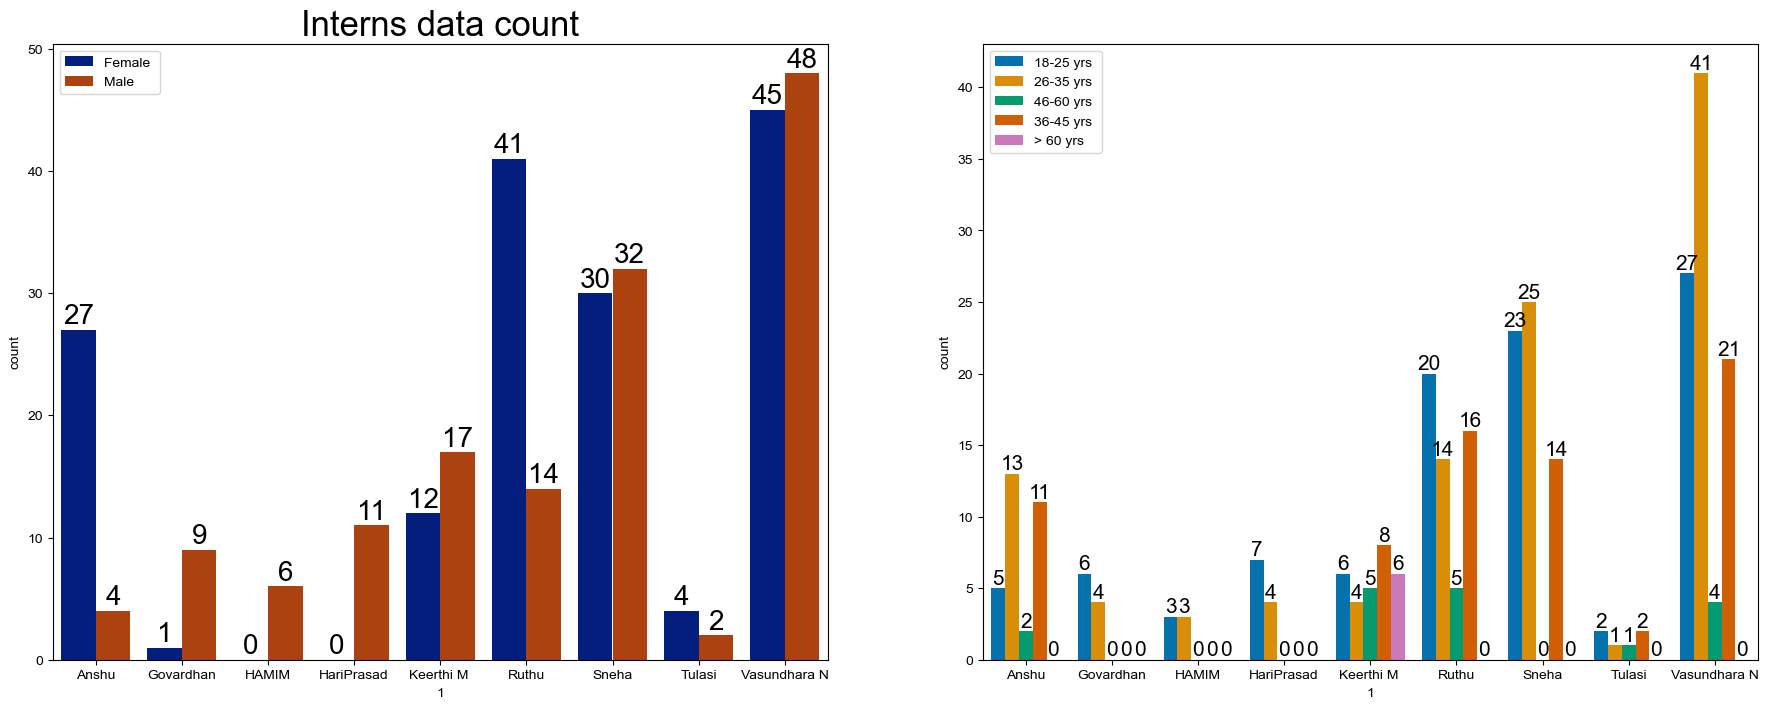

In [22]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot(x=df['1'],data=df,palette = 'dark',hue='17',saturation=0.95,ax=ax[0])
ax[0].set_title('Interns data count',color='black',size=25)
ax[0].legend()
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=df['1'],data=df,palette = 'colorblind',hue='18',saturation=0.95,ax=ax[1])
ax[1].legend()
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)   


In [23]:
# lets get the value count of each unique value of combination of column 3 and column date for each unique value of 1
grouped = df.groupby(['1', '3', 'date']).size()

# Reset the index to convert the Series back to a DataFrame
result = grouped.reset_index(name='count')

# Filter the results where count is greater than 3
filtered_result = result[result['count'] > 1]

print(filtered_result)

              1                      3        date  count
71   Keerthi M   M chinnaswamy stadium  18-05-2024      2
91        Ruthu   Banshankarsi temple   17-05-2024      2
92        Ruthu   Banshankarsi temple   18-05-2024      2
94        Ruthu   Banshankarsi temple   25-05-2024      2
117       Ruthu      National College   17-05-2024      2
119       Ruthu      National College   20-05-2024      2
120       Ruthu      National College   25-05-2024      2


In [24]:
df['23'].unique()

array(['If a segregated cycle track is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 3₹ .',
       'If a marked cycle lane is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 1₹. ',
       'Will not use',
       'If a marked cycle lane is provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 2₹.  ',
       'NA',
       'If a segregated cycle track provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 4₹ . .                                                                                                                                                                     .',
       'Current travelling conditions with no special cycling facility.Additional cost Per Trip 0₹. ಯಾವುದೇ ವಿಶೇಷ ಸೈಕ್ಲಿಂಗ್ ಸೌಲಭ್ಯವಿಲ್ಲ

In [25]:
parking_dict={'No, I will not use a bicycle. ':'Will not use',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ':'Current conditions',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ':'Marked lane',
       'Not Applicable- because neither of my trip end is home. ':'NA',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ':'Marked lane + signal',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ':'Segregated track',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ':'Segregated track + signal'}

df['23']=df['23'].map(parking_dict).fillna(df['23'])

In [26]:
df['23'].unique()

array(['If a segregated cycle track is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 3₹ .',
       'If a marked cycle lane is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 1₹. ',
       'Will not use',
       'If a marked cycle lane is provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 2₹.  ',
       'NA',
       'If a segregated cycle track provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 4₹ . .                                                                                                                                                                     .',
       'Current travelling conditions with no special cycling facility.Additional cost Per Trip 0₹. ಯಾವುದೇ ವಿಶೇಷ ಸೈಕ್ಲಿಂಗ್ ಸೌಲಭ್ಯವಿಲ್ಲ

In [27]:
display(HTML(f"<h2>Origin and destination both are not home and response to Q23 was recorded as willing to use their own bicycle</h2>"))

In [28]:
# lets get the count of number of instances for each unique value of column 1 where when column 4 and column 6 both are not equal to Home and also column 23 
# is not equal to NA
print(df[(df['4']!='Home ') & (df['6']!='Home ') & (df['23']!='NA')]['1'].value_counts())

1
Keerthi M       6
Anshu           1
Sneha           1
Vasundhara N    1
Name: count, dtype: int64


In [29]:
display(HTML(f"<h2>Check of qualification with age </h2>"))   

In [31]:
# lets see the value counts of each value in column 19 for each unique entry of column 18


grouped_value_counts = df.groupby(['18', '19']).size()

result = grouped_value_counts.reset_index(name='count')

# Rename columns for better readability
result.columns = ['18', '19', 'count']

# Display the final result with proper alignment
final_result = result.pivot_table(index='18', columns='19', values='count', fill_value=0)

# Sort the columns for better readability
final_result = final_result.sort_index(axis=1, level=0, ascending=False)

# Print the final result
print(final_result.to_string(index=True))

19          Trade/Diploma Certificate   Postgraduate   Graduate   Doctorate   < 10th Std.   12th Std.   10th Std. 
18                                                                                                                
18-25 yrs                          6.0            0.0       87.0         0.0           0.0         6.0         0.0
26-35 yrs                          7.0            7.0       78.0         3.0           0.0        12.0         2.0
36-45 yrs                         10.0            4.0       33.0         0.0           0.0        20.0         5.0
46-60 yrs                          2.0            0.0        5.0         0.0           1.0         7.0         2.0
> 60 yrs                           0.0            0.0        2.0         0.0           1.0         2.0         1.0


In [32]:
display(HTML(f"<h2>Age and occupation</h2>"))    

In [33]:
df.groupby('18')['20'].value_counts()

18          20                           
18-25 yrs   Student                          87
            Employed Private                 11
            Unemployed/Retired/Homemaker      1
26-35 yrs   Employed Private                 74
            Unemployed/Retired/Homemaker     18
            Business                          7
            Student                           4
            Employed Govt.                    4
            Daily Wage                        2
36-45 yrs   Employed Private                 37
            Unemployed/Retired/Homemaker     23
            Business                          6
            Daily Wage                        3
            Student                           2
            Employed Govt.                    1
46-60 yrs   Unemployed/Retired/Homemaker     10
            Employed Private                  4
            Business                          1
            Daily Wage                        1
            Employed Govt.                    

In [34]:
display(HTML(f"<h2>Prints if the respondent reported as unemployed but his details such as age, OD are not consistent</h2>"))

In [35]:
df['20'].unique()

# for each entry of column 20 with 'Unemployed/Retired/Homemaker ' get the column 1 and column Timestamp if column 18 is not >60 yrs or 46-60 yrs,
#  and column 4 is work and column 6 is work
df[(df['20']=='Unemployed/Retired/Homemaker ') & (df['18']!='>60 yrs') & (df['18']!='46-60 yrs') & ((df['4']=='Work ') | (df['6']=='Work '))][['1','Timestamp']]

# df[df['20']=='Unemployed/Retired/Homemaker '][['18','17','4','6']]

,1,Timestamp


In [36]:
df[df['1']=='HariPrasad']['5'].unique()

array(['National College ', 'Peenya industrial area ', 'KR market ',
       'Dayanada Sagar college ',
       'Jayanagar 6 th block near ragigudda arch', 'Balepet',
       'Kallahasthi nagar', 'Dr raj kumar circle ', 'Mes college ',
       'Saraki nagar', 'Kotnur'], dtype=object)

In [37]:
display(HTML(f"<h2>Sanity check for total time</h2>"))

In [38]:
from tabulate import tabulate

output_rows = []

total_10b_11b = df['10a'] + df['11a']
df['9'] = pd.to_numeric(df['9'], errors='coerce')

# Create a list of tuples containing the relevant information
for index, value in df.iterrows():
    if total_10b_11b[index] >= value['9']:
        output_rows.append([
            value['1'],   # Intern
            index,        # Index
            value['9'],   # Total Time
            value['10a'], # Access Time
            value['11a'], # Egress Time
            value['9']-value['10a']-value['11a'], #difference
            value['2c'],  #Origin
            value['2d'], #Destination
        ])

# Sort the list of tuples based on the enumerator name alphabetically
output_rows.sort(key=lambda x: x[0])

# Print the output as a table
print(tabulate(output_rows, headers=["Intern","Index", "Total Time", "Access Time", "Egress Time","Time in metro","Origin","Destination"]))


Intern        Index    Total Time    Access Time    Egress Time    Time in metro  Origin                                   Destination
----------  -------  ------------  -------------  -------------  ---------------  ---------------------------------------  -----------------------
Anshu            18            15             10              5                0  Magadi Road                              Vijayanagar
Govardhan        31            15             15             10              -10  Krishna Rajendra Market                  Rajajinagar
Govardhan        39            15             10             10               -5  Silk Institute                           Jayaprakash Nagar
HariPrasad       48            10             10             10              -10  Peenya Industry                          Nagasandra
HariPrasad       49            25             15             15               -5  Krishna Rajendra Market                  Yelachenahalli
HariPrasad       50            10  

### Sanity check for bicycle question

In [39]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        for index, value in df[column].items():
            if value.count(',') > 1:
                print(f"Intern: {df.iloc[index]['1']}, Question: {column}, Index: {index}")
